# COMP3160: Assignment 1

## Introduction

The data set 'loans.csv' includes three kinds of customers: those who have paid off their loans (PAIDOFF), those who have been past due and put into collection without paying back their loan and interests (COLLECTION), and those who have paid off only after they were put in collection (COLLECTION_PAIDOFF).

**loan_id:** A unique loan (ID) assigned to each loan customers - system generated.
<br> **loan_status:** Whether a loan is paid off, in collection process - customer is yet to payoff, or paid off after the collection efforts.
<br> **principal:** Basic principal loan amount at the origin.
<br> **terms:** Can be weekly (7 days), biweekly, and monthly payoff schedule.
<br> **effective_date:** When the loan got originated (started).
<br> **due_date:** Due date by which loan should be paid off.
<br> **paid_off_time:** Actual time when loan was paid off, null means yet to be paid.
<br> **past_due_days:** How many days a loan has past due date.
<br> **age:** Age of customer.
<br> **education:** Education level of customer who applied for loan.
<br> **gender:** Customer gender (male/female).

The basic idea of this assignment is to figure out which features are useful for predicting the loan status and then to investigate and compare how well three different classifiers solve this problem. You don't have to implement a complete solution from scratch, but instead you are guided towards this goal via a number of tasks. First you will have to explore the dataset, then clean it up, deal with missing data, visualise the data, convert the categorical values into a suitable numeric form, standardise the features, and then use three different classifiers (logistic regression, k-nearest neighbor, and support vector machine) to get the job done.

The assignment is worth 20 marks.

In [436]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Exploring the Data

**Task 1:** Read the dataset 'loans.csv' into a pandas dataframe and print the first 5 rows of the dataframe [0.25 mark].

In [437]:
# read the 'loans.csv' spreadsheet into a pandas dataframe
loans = pd.read_csv('loans.csv')
# print first 5 rows
loans.head()

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/08/2016,10/07/2016,9/14/2016 19:31,NaN,45,high school or below,male
1,xqd20168902,PAIDOFF,1000,30,9/08/2016,10/07/2016,10/07/2016 9:00,NaN,50,bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/08/2016,10/07/2016,9/25/2016 16:58,NaN,33,bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/08/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/09/2016,10/08/2016,9/23/2016 21:36,NaN,28,college,female


**Task 2:** Print a concise summary for the dataframe with the help of the info() function [0.25 mark].

In [438]:
# print a concise summary of the loans dataframe
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_id         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


**Task 3:** Print a descriptive statistics for the dataframe with the help of the describe() function [0.25 mark].

In [439]:
# print descriptive statistics of the dataframe
loans.describe()

,principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## Cleaning the Data

**Task 4:** Fix all typos in the education column of the dataframe with the help of the replace() function [0.25 mark].

In [440]:
# replace the typo in the education column "bechalor" with the correct spelling "bachelor"
loans['education'] = loans['education'].str.replace('bechalor', 'bachelor')
# print cleaned column
loans['education']

0      high school or below
1                  bachelor
2                  bachelor
3                   college
4                   college
               ...         
495    high school or below
496    high school or below
497                 college
498                 college
499    high school or below
Name: education, Length: 500, dtype: object

**Task 5:** Find the number of missing values for each column using the isna() and sum() function, and print the number for each column [0.25 mark].

In [441]:
# print number of missing values in each column
loans.isna().sum()

loan_id             0
loan_status         0
principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
gender              0
dtype: int64

**Task 6:** Replace all missing values in the 'paid_of_time' column by -1 and all missing values in the 'past_due_days' column by 0 using the fillna() function. Check the number of missing values afterwards by printing them out as before [0.5 mark].

In [442]:
# replace missing values
loans = loans.fillna(value = {'paid_off_time': -1, 'past_due_days': 0})
# print updated number of missing values
loans.isna().sum()

loan_id           0
loan_status       0
principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
gender            0
dtype: int64

**Task 7:** Print the first five rows of the dataframe where the value for the 'loan_status' column is 'PAIDOFF' using the loc() function [0.25 mark].

In [443]:
loans.loc[loans['loan_status'] == 'PAIDOFF'].head()

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/08/2016,10/07/2016,9/14/2016 19:31,0.0,45,high school or below,male
1,xqd20168902,PAIDOFF,1000,30,9/08/2016,10/07/2016,10/07/2016 9:00,0.0,50,bachelor,female
2,xqd20160003,PAIDOFF,1000,30,9/08/2016,10/07/2016,9/25/2016 16:58,0.0,33,bachelor,female
3,xqd20160004,PAIDOFF,1000,15,9/08/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/09/2016,10/08/2016,9/23/2016 21:36,0.0,28,college,female


**Task 8:** Print the first five rows of the dataframe where the value for the loan_status column is 'COLLECTION' using the loc() function [0.25 mark].

In [444]:
loans.loc[loans['loan_status'] == 'COLLECTION'].head()

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
300,xqd20160301,COLLECTION,1000,15,9/09/2016,9/23/2016,-1,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/09/2016,10/08/2016,-1,61.0,37,high school or below,male
302,xqd20160303,COLLECTION,1000,30,9/09/2016,10/08/2016,-1,61.0,33,high school or below,male
303,xqd20160304,COLLECTION,800,15,9/09/2016,9/23/2016,-1,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/09/2016,9/23/2016,-1,76.0,24,bachelor,male


**Task 9:** Print the data types for each column [0.25 mark].

In [445]:
# data types for each column
loans.dtypes

loan_id            object
loan_status        object
principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
gender             object
dtype: object

**Task 10:** Convert the columns 'effective_date', 'due_date', and 'paid_off_time' to datetime format and make sure that all three columns show the format YYYY-MM-DD and nothing else (using the to_datetime() function). Print the data types of the converted columns [1 mark]. 

In [446]:
# convert the columns 'effective_date', 'due_date', and 'paid_off_time' to datetime format 
loans[['effective_date', 'due_date', 'paid_off_time']] = loans[['effective_date', 'due_date', 'paid_off_time']].apply(pd.to_datetime)

# get rid of the timestamp on the 'paid_off_time' column
loans['paid_off_time'] = loans['paid_off_time'].dt.date
loans['paid_off_time'] = loans['paid_off_time'].apply(pd.to_datetime)

# print the data types of the converted columns
loans[['effective_date', 'due_date', 'paid_off_time']].dtypes

effective_date    datetime64[ns]
due_date          datetime64[ns]
paid_off_time     datetime64[ns]
dtype: object

## Dealing with Missing Data

**Task 11:** Replace all instances of 0 in the 'past_due_days' column by actual values using the information in the dataframe (note that a new value can be a positive number or a negative number or zero) -- the Timedelta() function may be helpful in this process. Print the first 5 rows of the dataframe [1 mark].

In [447]:
# import datetime and math libraries to ease calculations
import datetime
import math

# loop through all records where 'loan_status' is PAIDOFF
for k in range(len(loans[loans['loan_status'] == "PAIDOFF"])):
    # with all these paid off loan records, calculate the differences between the effective_date from due_date
    temp = loans.loc[k,'due_date'] - loans.loc[k,'effective_date'] + datetime.timedelta(days = 1)
    # if this difference exceeds the number of loan terms, the due date is the effective data + no. of terms
    # and update this in the dataset
    if(int(temp / datetime.timedelta(days=1)) > loans.loc[k, 'terms']):
         loans.loc[k, 'due_date'] = loans.loc[k, 'effective_date'] + (loans.loc[k, 'terms'])*datetime.timedelta(days = 1)

# now iterate through all records where 'loan_status' is PAIDOFF again
for k in range(len(loans[loans['loan_status'] == "PAIDOFF"])):
    # with all these same records, calculate the number of past due days by subtracting the due date from paid off time
    # and update this value in the dataset
    temp = loans.loc[k, 'paid_off_time'] - loans.loc[k,'due_date']
    loans.loc[k, 'past_due_days'] = int(math.floor(temp / datetime.timedelta(days=1)))

# print the first 5 rows of this amended dataset 
loans.head()

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,-23.0,45,high school or below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,-12.0,33,bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,-15.0,28,college,female


## Visualising the Data

**Task 12:** Use a seaborn count plot to plot the relationship between 'age' and 'loan_status'; make sure that your plot looks identical to the one below, incl. legend [1 mark].

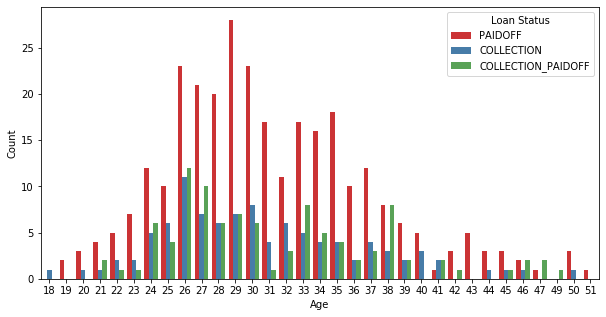

In [448]:
# import seaborn library for graphs
import seaborn as sns

# enlarge figure size
plt.figure(figsize=(10, 5))

# plot countplot for 'age' and 'loan_status' with necessary graph features
fig = sns.countplot(x="age", data=loans, hue="loan_status", palette="Set1")
plt.legend(title="Loan Status", loc="upper right", labels=["PAIDOFF", "COLLECTION", "COLLECTION_PAIDOFF"])
fig.set(xlabel="Age", ylabel="Count")
plt.show(fig)

**Task 13:** Use a seaborn count plot to plot the relationship between 'eduation' and 'loan_status'; make sure that your plot looks identical to the one below, incl. legend  [1 mark].

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Education')]

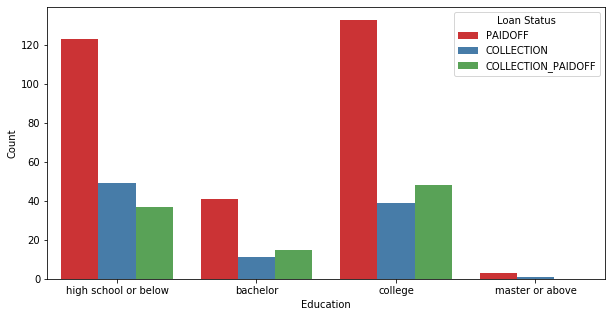

In [449]:
# enlarge figure size
plt.figure(figsize=(10, 5))

# plot countplot for 'education' and 'loan_status' with necessary graph features
fig = sns.countplot(x="education", data=loans, hue="loan_status", palette="Set1")
plt.legend(title="Loan Status", loc="upper right", labels=["PAIDOFF", "COLLECTION", "COLLECTION_PAIDOFF"])
fig.set(xlabel="Education", ylabel="Count")

**Task 14:** Use a seaborn count plot to plot the relationship between 'gender' and 'loan_status'; make sure that your plot looks identical to the one below, incl. legend [1 mark].

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Gender')]

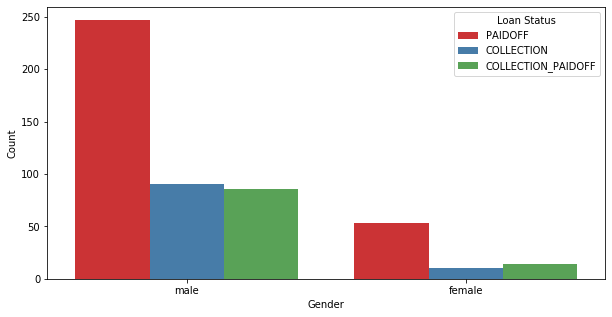

In [450]:
# enlarge figure size
plt.figure(figsize=(10, 5))

# plot countplot for 'gender' and 'loan_status' with necessary graph features
fig = sns.countplot(x="gender", data=loans, hue="loan_status", palette="Set1")
plt.legend(title="Loan Status", loc="upper right", labels=["PAIDOFF", "COLLECTION", "COLLECTION_PAIDOFF"])
fig.set(xlabel="Gender", ylabel="Count")

**Task 15:** Use a seaborn count plot to plot the relationship between 'principal' and 'loan_status'; make sure that your plot looks identical to the one below, incl. legend [1 mark].

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Principal')]

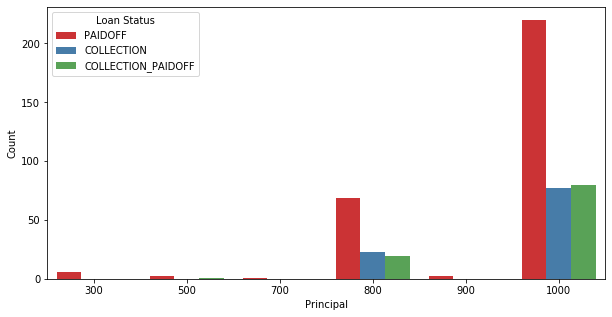

In [451]:
# enlarge figure size
plt.figure(figsize=(10, 5))

# plot countplot for 'principal' and 'loan_status' with necessary graph features
fig = sns.countplot(x="principal", data=loans, hue="loan_status", palette="Set1")
plt.legend(title="Loan Status", loc="upper left", labels=["PAIDOFF", "COLLECTION", "COLLECTION_PAIDOFF"])
fig.set(xlabel="Principal", ylabel="Count")

**Task 16:** Use a seaborn count plot to plot the relationship between 'terms' and 'loan_status'; make sure that your plot looks identical to the one below, incl. legend [1 mark].

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Terms')]

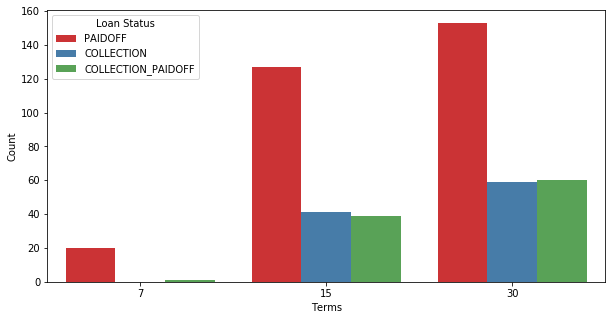

In [452]:
# enlarge figure size
plt.figure(figsize=(10, 5))

# plot countplot for 'terms' and 'loan_status' with necessary graph features
fig = sns.countplot(x="terms", data=loans, hue="loan_status", palette="Set1")
plt.legend(title="Loan Status", loc="upper left", labels=["PAIDOFF", "COLLECTION", "COLLECTION_PAIDOFF"])
fig.set(xlabel="Terms", ylabel="Count")

**Task 17:** Use a seaborn boxplot to plot the relationship between 'loan_status' and 'past_due_days'; make sure that your plot looks identical to the one below [1 mark].

[Text(0, 0.5, 'Past Due Days'), Text(0.5, 0, 'Loan Status')]

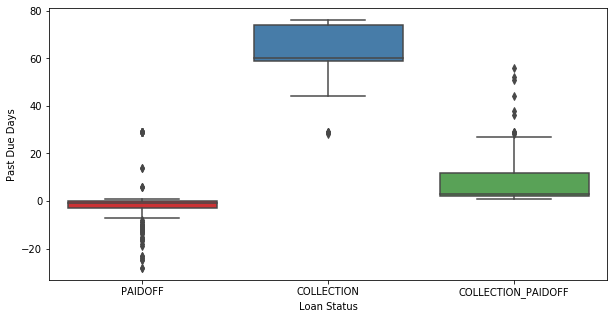

In [453]:
# enlarge figure size
plt.figure(figsize=(10, 5))

# plot boxplot for 'past_due_dats' and 'loan_status' with necessary graph features
fig = sns.boxplot(x="loan_status", y="past_due_days", data=loans, palette="Set1")
fig.set(xlabel="Loan Status", ylabel="Past Due Days")

## Converting Categorical Values

**Task 18:** Use one hot encoding to convert categorical values into numeric values and generate a dataframe that contains the following features: 'principal', 'terms', 'past_due_days', 'age', 'gender', 'bachelor', 'college', and 'high school or below' [1.5 marks].

In [454]:
# generate dataframe with one hot encoded variables for 'education'
education_OHE = pd.get_dummies(loans.education)

# remove master or above
education_selected = education_OHE[['bachelor', 'college', 'high school or below']]

# replace values in the gender column of the loans dataframe: male = 1, female = 0
loans['gender'] = loans['gender'].map(dict(zip(['male','female'],[1,0])))

# select required features
selected = loans[['principal', 'terms', 'past_due_days', 'age', 'gender']]

# merge selected features with the new one hot encoded education dataframe
data = pd.concat([selected, education_selected], axis=1)

# print finished dataset
data

,principal,terms,past_due_days,age,gender,bachelor,college,high school or below
0,1000,30,-23.0,45,1,0,0,1
1,1000,30,0.0,50,0,1,0,0
2,1000,30,-12.0,33,0,1,0,0
3,1000,15,0.0,27,1,0,1,0
4,1000,30,-15.0,28,0,0,1,0
...,...,...,...,...,...,...,...,...
495,1000,30,3.0,28,1,0,0,1
496,1000,15,14.0,26,1,0,0,1
497,800,15,3.0,30,1,0,1,0
498,1000,30,1.0,38,0,0,1,0


**Task 19:** Use one hot encoding to convert the categorical values for the 'loan_status' label into numerical values [0.5 mark].

In [455]:
# Change 'loan_status' values using one hot encoding: COLLECTION = 0, COLLECTION_PAIDOFF = 1, PAIDOFF = 2
loans['loan_status'] = loans['loan_status'].map(dict(zip(['COLLECTION','COLLECTION_PAIDOFF', "PAIDOFF"],[0,1,2])))

# print transformed 'loan_status' column
print(loans['loan_status'])

0      2
1      2
2      2
3      2
4      2
      ..
495    1
496    1
497    1
498    1
499    1
Name: loan_status, Length: 500, dtype: int64


## Standardising Features

**Task 20:** Use the StandardScaler class from sklearn.preprocessing to scale the features and then display the first 5 rows [0.5 mark].

In [456]:
# import StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# apply scaler to the dataset
scaler.fit(data)
scaled_data = scaler.transform(data)

# print first 5 rows of scaled dataset
scaled_data[0:5, :]

array([[ 0.49337687,  0.89789115, -1.36149001,  2.28404253,  0.42665337,
        -0.39336295, -0.88640526,  1.17997648],
       [ 0.49337687,  0.89789115, -0.50581534,  3.10658738, -2.34382305,
         2.54218146, -0.88640526, -0.84747452],
       [ 0.49337687,  0.89789115, -0.95225429,  0.3099349 , -2.34382305,
         2.54218146, -0.88640526, -0.84747452],
       [ 0.49337687, -0.97897162, -0.50581534, -0.67711892,  0.42665337,
        -0.39336295,  1.12815215, -0.84747452],
       [ 0.49337687,  0.89789115, -1.06386403, -0.51260995, -2.34382305,
        -0.39336295,  1.12815215, -0.84747452]])

## Train/Test Split

**Task 21:** Import the train_test_split function from sklearn.model_selection, split the data into a training set (80%) and a test set (20%) with random state set to 42, print the shape of the training set and the test set [1 mark].

In [457]:
# import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# split the data: features ('principal', 'terms', 'past_due_days', 'age', 'gender', 'bachelor', 'college',
# and 'high school or below') = X, loan_status = y into 80% training and 20% testing datasets
train_X, test_X, train_y, test_y = train_test_split(
    scaled_data, loans['loan_status'], test_size=0.20,random_state=42)

# print the shape the training and set datasets
print("Training set:",train_X.shape,train_y.shape)
print("Test set:",test_X.shape,test_y.shape)

Training set: (400, 8) (400,)
Test set: (100, 8) (100,)


## Fitting and Scoring the Models

**Task 22:** Import the LogisticRegression class from sklearn.linear_model, create an instance, fit the model, and report the training score and the testing score [1 mark].

In [458]:
# import LogisticRegession library from sklearn.model_selection
from sklearn.linear_model import LogisticRegression

# create logistic regressor
lr = LogisticRegression()

# apply to the logistic regressor to the training datasets
lr.fit(train_X, train_y)

# score the training and testing datasets accuracy based on the logistic regression model
lr_train_score = lr.score(train_X, train_y)
lr_test_score = lr.score(test_X, test_y)

# print the training and testing accuracies
print("Train Score:",lr_train_score)
print("Test Score:", lr_test_score)

Train Score: 0.79
Test Score: 0.78


**Task 23:** Use the KNeighborsClassifier class from sklearn.neighbors, set k to 7, create an instance, fit the model, and report the training score and the testing score [1 mark].

In [459]:
#import knearest neighbors classifier library from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

# apply to the KNN Classifier to the training datasets
knn.fit(train_X, train_y)

# score & print the training and testing datasets accuracy based on the KNN Classifier model
print("Train Score:",knn.score(train_X, train_y))
print("Test Score:",knn.score(test_X, test_y))

Train Score: 0.82
Test Score: 0.73


**Task 24:** Find the best (non-overfitting) value for k in the range between 1 and 100 for the k-nearest neighbor classifier and plot the testing accuracy and the training accuracy  [1,5 marks].

In [460]:
# set up a variable storing the range of possible k values (1-100)
k_range = range(1, 101)

# create Python dictionary using [] to store the testing and training accuracy scores
training_scores = []
test_scores = []


# loop through the range 1 to 100
for k in k_range:
    # iterate through each k Classifer and create a KNN Classifier using each k
    knn = KNeighborsClassifier(n_neighbors=k)
    # apply the KNN Classifier to the training datasets
    knn.fit(train_X, train_y)
    # add the training and testings scores to the created dictionaries
    training_scores.append(knn.score(train_X, train_y))
    test_scores.append(knn.score(test_X, test_y))

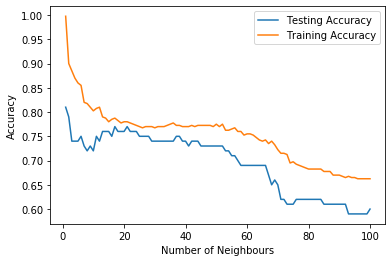

In [461]:
# plot the relationship between the number of neighbours (k) and the training and testing accuracy
plt.plot(k_range, test_scores, label='Testing Accuracy')
plt.plot(k_range, training_scores, label='Training Accuracy')
# create graph axis labels and legend
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.legend()

From the above graph, the testing accuracy is heighest at k=1 and k=2, but this is a very small number of neighbours. After these two values, the trend declines and only starts to increase at k=11. The testing accuracy peaks just before k=20 and just after k=20 and then mostly declines as the number of neighbours continue to increase. Therefore, the values after k=2 that have the highest testing accuracy are k=17 and k=21 respectively. Consequently, the best (non-overfitting) value for k in the range between 1 and 100 for the k-nearest neighbor classifier is k=17. This is because although it has the same testing accuracy as k=21, k=17 is a lower number of neighbours, meaning it is not as over-fitted as k=21.

**Task 25**: Now run the k-nearest neighbor classifier again with the best value that you got for k on the test data, and report the training score and the testing score [0.5 mark].

In [462]:
# Your code goes here.
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=17)

#Train the model using the training sets
knn.fit(train_X, train_y)

# score the training and testing datasets accuracy based on the knearest neighbours Classifier model
# store these accuracy scores as variables for task 27
knn_train_score = knn.score(train_X, train_y)
knn_test_score = knn.score(test_X, test_y)

# print training and testing accuracy scores
print("Train Score:", knn_train_score)
print("Test Score:", knn_test_score)

Train Score: 0.7875
Test Score: 0.77


**Task 26:** Import the SVC class from sklearn.svm, create an instance using a linear kernel and set the hyperparameter C to 1, fit the model, and report the training ant testing score [1 mark].

In [463]:
# import svm (Support Vector Machines) library from sklearn.svn
from sklearn import svm


svm_model = svm.SVC(kernel='linear', C = 1.0)
svm_model.fit(train_X, train_y)

# score the training and testing datasets accuracy based on the Support Vector Machines (SVM) model
# store these accuracy scores as variables for task 27
svm_train_score = svm_model.score(train_X, train_y)
svm_test_score = svm_model.score(test_X, test_y)

# print training and testing accuracy scores
print("Train Score:",svm_train_score)
print("Test Score:",svm_test_score)

Train Score: 0.795
Test Score: 0.78


## Comparing the Models

**Task 27:** In order to compare the models, generate a dataframe with the model name, training score and the testing score as column names and display that dataframe [1 mark].

In [464]:
# create a array with the columns: Model, Training Score and Testing Score. Use testing and training scores variables
# from previous models.
models_data = {'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine'],
              'Training Score': [lr_train_score, knn_train_score, svm_train_score],
              'Testing Score': [lr_test_score, knn_test_score, svm_test_score]
              }

# convert array to a pandas dataframe
df_model = pd.DataFrame(models_data, columns = ['Model', 'Training Score', 'Testing Score'])

# print the dataframe
df_model

,Model,Training Score,Testing Score
0,Logistic Regression,0.7900,0.78
1,K-Nearest Neighbour,0.7875,0.77
2,Support Vector Machine,0.7950,0.78
